In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils_cd import (
        split_dataset,
        standard_deviation,
        plot_comparison_results,
        impute_values
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from fancyimpute import KNN

pd.options.display.max_columns = None
sns.set(style='darkgrid')

base_clfs = [BernoulliNB(), RandomForestClassifier(n_estimators=100), KNeighborsClassifier()]

def print_missing_percentage(df, name='Dataset'):
    print('{} missing values percentage: {}'.format(name, (df.shape[0] - df.dropna().shape[0]) / df.shape[0] * 100))

CLASS = 'class'
train = pd.read_csv('./aps_failure_training_set.csv',
                        skiprows=20,keep_default_na=False, na_values='na')
test = pd.read_csv('./aps_failure_test_set.csv',
                        skiprows=20,keep_default_na=False, na_values='na')

print_missing_percentage(train, 'Train')
print_missing_percentage(train, 'Test')

X_train, y_train = split_dataset(train, CLASS)
X_test, y_test = split_dataset(test, CLASS)
y_train = y_train.map({'pos': 1, 'neg': 0})
y_test = y_test.map({'pos': 1, 'neg': 0})

aps = pd.concat([X_train, X_test])

Train missing values percentage: 99.015
Test missing values percentage: 99.015


In [3]:
aps.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,7.600000e+04,17308.000000,7.173900e+04,5.715800e+04,72810.000000,72810.000000,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.518000e+04,7.520800e+04,7.520800e+04,7.040200e+04,7.518900e+04,7.520800e+04,7.518900e+04,7.524900e+04,7.518900e+04,7.524900e+04,72513.000000,7.520800e+04,7.520800e+04,7.520800e+04,72812.000000,72811.000000,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,75137.000000,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.518000e+04,72511.000000,72509.000000,72807.000000,72811.000000,7.518900e+04,7.518900e+04,7.524900e+04,7.524900e+04,4.687200e+04,4.149700e+04,2.590500e+04,2.027800e+04,1.729100e+04,1.553900e+04,1.429700e+04,1.360700e+04,7.507200e+04,7.580500e+04,7.511900e+04,7.511900e+04,7.187700e+04,7.542000e+04,7.251400e+04,70438.000000,7.507200e+04,7.188000e+04,75139.0,7.281000e+04,5.715800e+04,57158.000000,57158.000000,7.557600e+04,7.557600e+04,7.557600e+04,63988.000000,63545.000000,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,5.715800e+04,72513.000000,7.511900e+04,17308.000000,75142.000000,75142.000000,7.514200e+04,7.514200e+04,7.514200e+04,7.514200e+04,7.514200e+04,7.514200e+04,7.514200e+04,7.514200e+04,58474.000000,58474.000000,5.847400e+04,5.847400e+04,58474.000000,5.847400e+04,58474.000000,58474.000000,5.847400e+04,72809.000000,72512.000000,7.089800e+04,7.089800e+04,7.089800e+04,7.090000e+04,70899.000000,7.089900e+04,7.089800e+04,7.089700e+04,7.511900e+04,7.251200e+04,72510.000000,7.251000e+04,7.251000e+04,7.250900e+04,72509.000000,7.251000e+04,7.251000e+04,7.251300e+04,7.251200e+04,72515.000000,72515.000000,7.089900e+04,63117.000000,63988.000000,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,72514.000000,72515.000000
mean,6.115976e+04,0.725560,3.564398e+08,1.506300e+05,6.736959,10.836314,2.004306e+02,1.204761e+03,9.697328e+03,9.364902e+04,4.483426e+05,1.122573e+06,1.666272e+06,5.007954e+05,3.564389e+04,5.255755e+03,1.832622e+06,9.597229e+03,1.167200e+03,9.689417e+02,6.160588e+04,9.724470e+04,3.503077e+06,3.039594e+06,1.019361e+06,4.491939e+05,0.492877,2.473336e+02,5.196723e+03,2.999350e+02,1145.836840,377.019104,1.495621e+04,1.133445e+04,1.135212e+04,7.321961e+03,1.016125e+04,1.066613e+05,1.081914e+06,1.556827e+06,1.078965e+06,1.158223e+03,7.899449e+03,4.486525e+03,8.046204e+03,8.772173e+04,1.488475e+06,2.1

The dataset contains many missing values. Let's first start to make some analysis on the columns to check for correlations before dealing with this missing values, because imputing those can change the way columns correlate.

Because attribute correlations should be the same in training and testing set we will be analysing this with them together.

In [4]:
def attribute_corr(df, top):
        
    def get_redundant_pairs(df):
        '''Get diagonal and lower triangular pairs of correlation matrix'''
        pairs_to_drop = set()
        cols = df.columns
        for i in range(0, df.shape[1]):
            for j in range(0, i+1):
                pairs_to_drop.add((cols[i], cols[j]))
        return pairs_to_drop

    def get_top_abs_correlations(df, n=5):
        au_corr = df.corr().abs().unstack()
        labels_to_drop = get_redundant_pairs(df)
        au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
        return au_corr[0:n]

    
    return get_top_abs_correlations(df, top)

correlated_features = attribute_corr(aps, 11)
correlated_features = correlated_features.reset_index()
print(correlated_features)

   level_0 level_1    0
0   bb_000  bv_000  1.0
1   ah_000  bg_000  1.0
2   aa_000  bt_000  1.0
3   bv_000  cq_000  1.0
4   bb_000  cq_000  1.0
5   bu_000  cq_000  1.0
6   bu_000  bv_000  1.0
7   bb_000  bu_000  1.0
8   cf_000  co_000  1.0
9   ad_000  cf_000  1.0
10  ad_000  co_000  1.0


There are many variables with 1 correlation using Pearson Correlation Coefficient. Let's analyse them and check if we can create some new features out of them eliminating or derivating. Having less variables will improve the classifiers because of that rule, having more columns means more data to train.

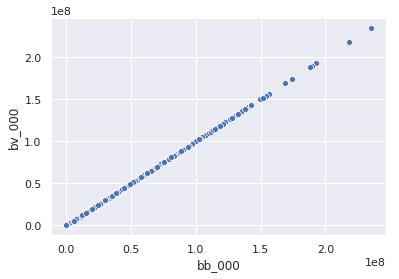

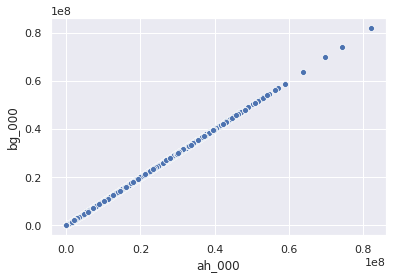

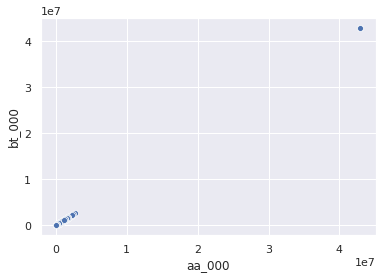

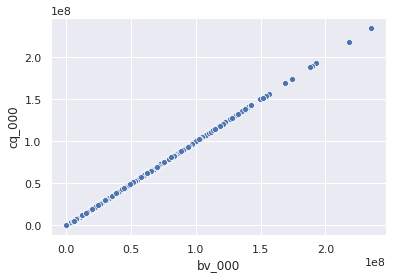

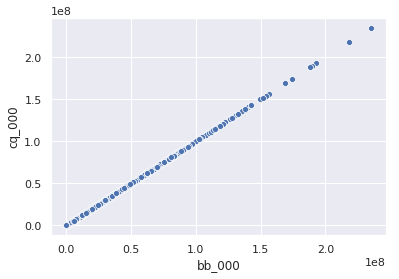

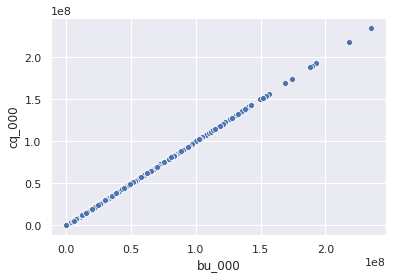

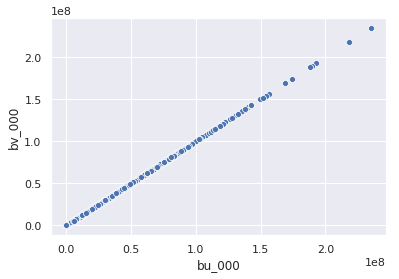

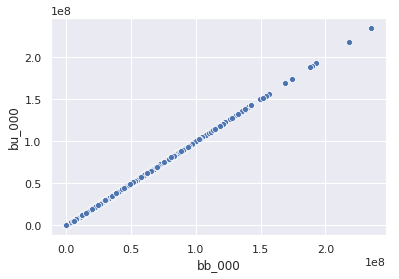

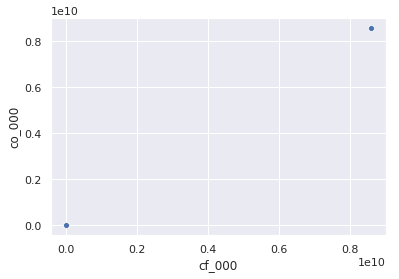

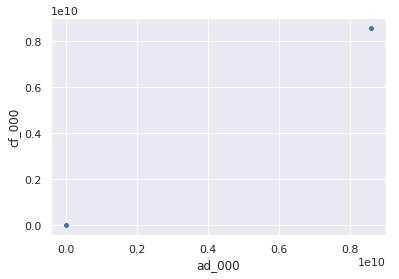

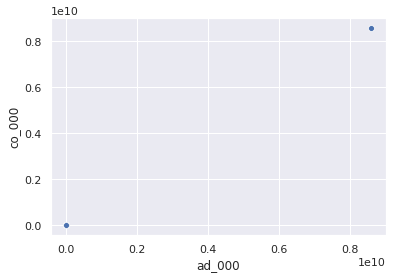

In [5]:
for index, corr in correlated_features.iterrows():
    sns.scatterplot(x=aps[corr['level_0']], y=aps[corr['level_1']], data=aps)
    plt.show()

In [6]:
equal_attrs = {}
all_attrs = set([])
sets = 0
for index, corr in correlated_features.iterrows():
    attr1 = corr['level_0']
    attr2 = corr['level_1']
    
    present = False
    if attr1 in equal_attrs:
        equal_attrs[attr1].append(attr1)
    for attr in equal_attrs:
        if attr1 in equal_attrs[attr] or attr2 in equal_attrs[attr]:
            equal_attrs[attr].add(attr1)
            equal_attrs[attr].add(attr2)
            present = True
            
    if not present:
        equal_attrs[sets] = set([attr1, attr2])
        sets += 1
        
best_attrs = []
all_attrs = []
for attrs in equal_attrs:
    best_attr = None
    best_nmr_missing = 600000
    for attr in equal_attrs[attrs]:
        all_attrs.append(attr)
        nmr_missing = aps[attr].isna().sum()
        if nmr_missing < best_nmr_missing:
            best_attr = attr
            best_nmr_missing = nmr_missing
        
    best_attrs.append(best_attr)

excluded_columns = [item for item in all_attrs if item not in best_attrs]
print('Best attributes to select {}'.format(best_attrs))
print('Excluded columns {}'.format(excluded_columns))

aps = aps.drop(aps[excluded_columns], axis=1)
X_train = X_train.drop(X_train[excluded_columns], axis=1)
X_test = X_test.drop(X_test[excluded_columns], axis=1)

print_missing_percentage(X_train, 'Train')
print_missing_percentage(X_test, 'Test')


Best attributes to select ['bb_000', 'bg_000', 'aa_000', 'co_000']
Excluded columns ['cq_000', 'bu_000', 'bv_000', 'ah_000', 'bt_000', 'cf_000', 'ad_000']
Train missing values percentage: 99.015
Test missing values percentage: 98.96875


We excluded the columns with the most missing values between all the ones that had a linear correlation.
The number of missing values didn't really change much because this columns didn't have many missing values.

Let's now check if there are some columns that don't provide any information to the model for explaining the class checking if some attribute has no standard deviation, this is, it's value doesn't vary.

In [7]:
no_std_dev = []
for col in aps:
    std_dev = standard_deviation(aps[col])
    if std_dev == 0:
        no_std_dev.append(col)
        
print('Attributes with 0 standard deviation {}'.format(no_std_dev))

Attributes with 0 standard deviation ['cd_000']


The column cd_000 only has one value, so, this column won't add any information to the classification and so it should be dropped.

In [8]:
aps = aps.drop(aps[no_std_dev], axis=1)
X_train = X_train.drop(X_train[no_std_dev], axis=1)
X_test = X_test.drop(X_test[no_std_dev], axis=1)

After analysing the dataset we found out that many columns have a very high amount of zeros. Given the number of positive class instances we can test an heuristic for removing this columns: if the amount of zeros in a column is superior to 90% and all the positive instances have 0 values than this column shouldn't be explanatory of the class and should be removed. We can test this heuristic after

In [9]:
#aps.apply( lambda s : s.value_counts().get(0,0), axis=0)

Let's now test strategies for imputing missing values. We will be testing replacing missing values with a constant (0), median, mean and using KNN to synthetize values for missing values using the values of the most similar (closest neighbors) instances available.

In [ ]:
X_train_orig, X_test_orig = impute_values(X_train, X_test, "constant", constant=0)
X_train_mean, X_test_mean = impute_values(X_train, X_test, "mean")
X_train_median, X_test_median = impute_values(X_train, X_test, "median")
X_train_mfrequent, X_test_mfrequent = impute_values(X_train, X_test, "most_frequent")

X_data = {'Original': (X_train_orig, X_test_orig), 'Mean': (X_train_mean, X_test_mean), 'Median': (X_train_median, X_test_median), 'Most Frequent': (X_train_mfrequent, X_test_mfrequent)}
plot_comparison_results(base_clfs, X_data, y_train, y_test, technique='Technique', filename='missing_values')